In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch
import torch.nn as nn
import torchvision.models as models
import time
import os
import math
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

train_on_gpu = torch.cuda.is_available()

cuda:0


In [ ]:
num_classes=2

model_ft = models.resnet34(pretrained=True)

num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Sequential(
     nn.Dropout(0.2),
     nn.Linear(model_ft.fc.in_features, num_classes)
)

model_ft.layer1[0].bn2=nn.Sequential(
    nn.Dropout(0.6),
    nn.BatchNorm2d(64)
)

model_ft.layer1[1].bn2=nn.Sequential(
    nn.Dropout(0.6),
    nn.BatchNorm2d(64)
)

model_ft.layer4[2].bn2=nn.Sequential(
    nn.Dropout(0.6),
    nn.BatchNorm2d(512)
)

model_ft = model_ft.cuda()

criterion = nn.CrossEntropyLoss()

optimizer_ft=optim.SGD(model_ft.parameters(),lr=0.01,momentum=0.66)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
!pip3 install graphviz

In [ ]:
!pip3 install git+https://github.com/waleedka/hiddenlayer.git

  Cloning https://github.com/waleedka/hiddenlayer.git to /tmp/pip-req-build-hjcbsw5q
  Running command git clone -q https://github.com/waleedka/hiddenlayer.git /tmp/pip-req-build-hjcbsw5q


In [ ]:
print(model_ft)

In [ ]:
!pip3 install git+https://github.com/waleedka/hiddenlayer.git
import hiddenlayer as hl

transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

graph = hl.build_graph(model_ft, torch.zeros([1, 3, 224, 224]).cuda())
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('resnet34', format='png')



In [ ]:
graph = hl.build_graph(model_ft, torch.zeros([1, 3, 224, 224]).cuda())
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('resnet34', format='png')

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:1630: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


In [ ]:
!pip3 install git+https://github.com/waleedka/hiddenlayer.git
import hiddenlayer as hl


# Rather than using the default transforms, build custom ones to group
# nodes of residual and bottleneck blocks.
transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > BatchNorm > Relu", "ConvBnRelu"),
    # Fold Conv, BN layers together
    hl.transforms.Fold("Conv > BatchNorm", "ConvBn"),
    # Fold bottleneck blocks
    hl.transforms.Fold("""
        ((ConvBnRelu > ConvBnRelu > ConvBn) | ConvBn) > Add > Relu
        """, "BottleneckBlock", "Bottleneck Block"),
    # Fold residual blocks
    hl.transforms.Fold("""ConvBnRelu > ConvBnRelu > ConvBn > Add > Relu""",
                       "ResBlock", "Residual Block"),
    # Fold repeated blocks
    hl.transforms.FoldDuplicates(),
]

# Display graph using the transforms above
graph=hl.build_graph(model_ft, torch.zeros([1, 3, 224, 224]).cuda(), transforms=transforms)
graph
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('resnet34_new', format='png')


/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:1630: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


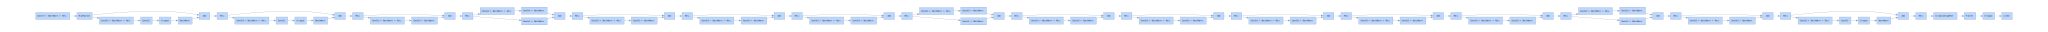

In [ ]:
graph

In [ ]:
graph.theme

{'background_color': '#FFFFFF',
 'fill_color': '#BCD6FC',
 'font_color': '#202020',
 'font_name': 'Verdana',
 'font_size': '10',
 'margin': '0,0',
 'outline_color': '#7C96BC',
 'padding': '1.0,0.5'}

In [ ]:

import torch.onnx

In [ ]:
torch.onnx.export(model_ft,  torch.zeros([1, 3, 224, 224]).cuda(), "model.onnx")

In [ ]:
from torchsummary import summary

In [ ]:
summary(model_ft,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
           Dropout-9           [-1, 64, 56, 56]               0
      BatchNorm2d-10           [-1, 64, 56, 56]             128
             ReLU-11           [-1, 64, 56, 56]               0
       BasicBlock-12           [-1, 64, 56, 56]               0
           Conv2d-13           [-1, 64, 56, 56]          36,864
      BatchNorm2d-14           [-1, 64,